In [33]:
from pyslise import PyScs
import numpy as np

y0 = (np.zeros((2,2)), np.eye(2))
    
def V(x):
    return [[x*x, 0], [0, x*x]]
M = 10
scs = PyScs(V, 2, 0, M, 8)

In [39]:
def error(E):
    l, dl = map(matrix, scs.propagate(E, y0, scs.min, scs.__match)[0])
    r, dr = map(matrix, scs.propagate(E, y0, scs.max, scs.__match)[0])
    return det(block_matrix([[l, r], [dl, dr]]))

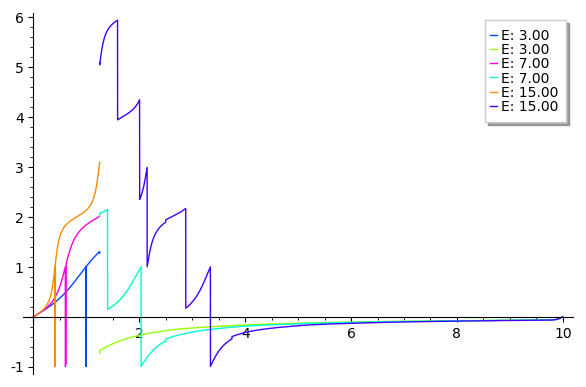

In [63]:
index = 0
def next_color():
    global index
    index += 1
    return hue(index*golden_ratio)

sum([
    sum([(lambda E, m, M:
        plot(
            lambda x: scs.propagate(E, y0, m, x)[1]/2/pi,
            (min(m, M), max(m, M)),
            color=next_color(),
            legend_label="E: %.2f"%E
        )
    )(E, *m) for m in [
        [scs.min, scs.__match],
        [scs.max, scs.__match]
    ]])
for E in [3, 7, 15]])

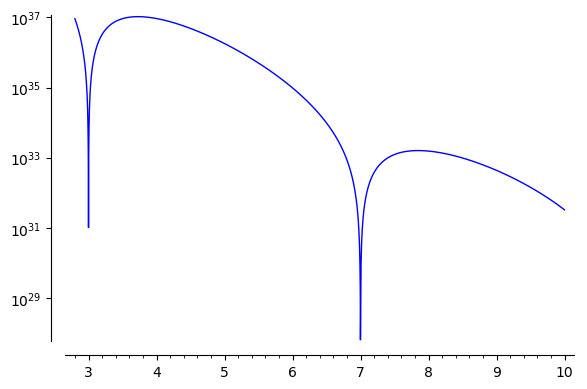

In [49]:
plot_semilogy(error, (2.8,10))

In [2]:
def error1(E):
    l, dl = map(matrix, scs.propagate(E, (matrix.zero(2,2), matrix.identity(2,2)), 0, M/2)[0])
    r, dr = map(matrix, scs.propagate(E,(matrix.zero(2,2), matrix.identity(2,2)), M, M/2)[0])
    return det(block_matrix([[l, r], [dl, dr]]))

def error2(E):
    left = matrix(scs.propagatePsi(E, matrix.zero(2,2), 0, M/2))
    right = matrix(scs.propagatePsi(E, matrix.zero(2,2), M, M/2))
    return det(left-right)

def error3(E):
    left = matrix(scs.propagatePsi(E, matrix.zero(2,2), 0, M/2))
    right = matrix(scs.propagatePsi(E, matrix.zero(2,2), M, M/2))
    l, dl = map(matrix, scs.propagate(E, (matrix.zero(2,2), matrix.identity(2,2)), 0, M/2)[0])
    r, dr = map(matrix, scs.propagate(E,(matrix.zero(2,2), matrix.identity(2,2)), M, M/2)[0])
    return det(l/dl - r/dr)

def data3(E):
    left = matrix(scs.propagatePsi(E, matrix.zero(2,2), 0, M/2))
    right = matrix(scs.propagatePsi(E, matrix.zero(2,2), M, M/2))
    l, dl = map(matrix, scs.propagate(E, (matrix.zero(2,2), matrix.identity(2,2)), 0, M/2)[0])
    r, dr = map(matrix, scs.propagate(E,(matrix.zero(2,2), matrix.identity(2,2)), M, M/2)[0])
    return (l, dl), (r, dr)

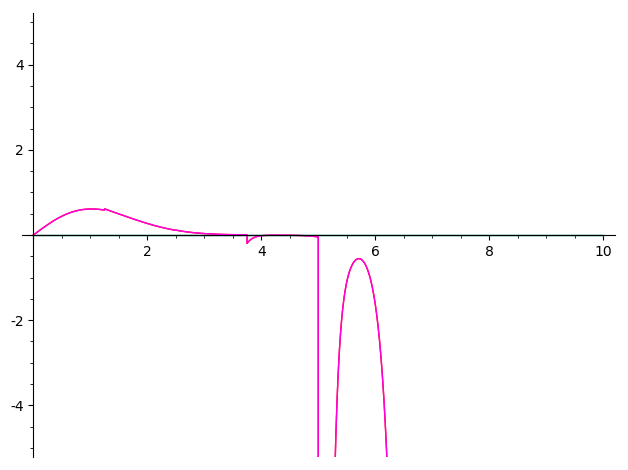

In [3]:
E = 3
Mv = 5
(sum(
    plot(lambda x: scs.propagate(E, (matrix.zero(2,2), matrix.identity(2,2)), 0, x)[0][0][i][j],
         (0, M), color=hue(golden_ratio*(i+2*j)))
    for i in range(0,2) for j in range(0,2))
).show(ymax=Mv, ymin=-Mv)

In [4]:
E = 3
x = 3
scs.propagate(E, (matrix.zero(2,2), matrix.identity(2,2)), 0, x)[0][0][0][0]

0.033209814595316675

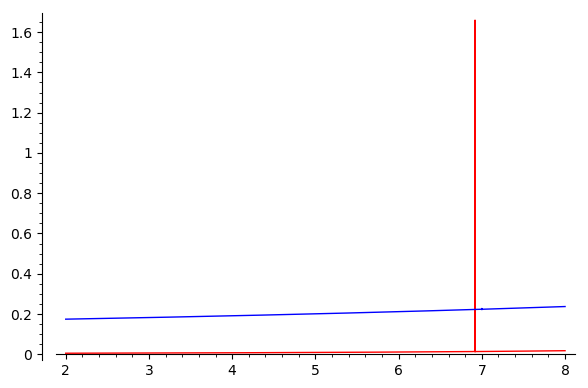

In [5]:
plot(error2, (2, 8), color="red") + plot(error3, (2, 8))

In [6]:
(l, dl), (r, dr) = data3(7)

In [7]:
l, dl

(
[-0.00029190626467613906                     0.0]
[                    0.0 -0.00029190626467613906],

[0.001277060829456166                  0.0]
[                 0.0 0.001277060829456166]
)

In [8]:
dl

[0.001277060829456166                  0.0]
[                 0.0 0.001277060829456166]